In [1]:
import os, sys
import numpy as np

unit_matcher_path = os.getcwd()
prototype_path = os.path.abspath(os.path.join(unit_matcher_path, os.pardir))
project_path = os.path.abspath(os.path.join(prototype_path, os.pardir))
lab_path = os.path.abspath(os.path.join(project_path, os.pardir))
sys.path.append(project_path)
os.chdir(project_path)
print(project_path)

from _prototypes.unit_matcher.main import format_cut, run_unit_matcher, map_unit_matches_first_session, map_unit_matches_sequential_session
from _prototypes.unit_matcher.read_axona import read_sequential_sessions, temp_read_cut
from _prototypes.unit_matcher.session import compare_sessions
from _prototypes.unit_matcher.write_axona import format_new_cut_file_name
from x_io.rw.axona.batch_read import make_study

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit


In [2]:
data_dir = lab_path + r'\neuroscikit_test_data\single_sequential'

animal = {'animal_id': 'id', 'species': 'mouse', 'sex': 'F', 'age': 1, 'weight': 1, 'genotype': 'type', 'animal_notes': 'notes'}
devices = {'axona_led_tracker': True, 'implant': True}
implant = {'implant_id': 'id', 'implant_type': 'tetrode', 'implant_geometry': 'square', 'wire_length': 25, 'wire_length_units': 'um', 'implant_units': 'uV'}

session_settings = {'channel_count': 4, 'animal': animal, 'devices': devices, 'implant': implant}

settings_dict_unmatched = {'ppm': 511, 'sessions': [session_settings,session_settings], 'smoothing_factor': 5, 'useMatchedCut': False}

settings_dict_matched = {'ppm': 511, 'sessions': [session_settings,session_settings], 'smoothing_factor': 5, 'useMatchedCut': True}

In [3]:
unmatched_study = run_unit_matcher([data_dir], settings_dict_unmatched)

Animal ID set
Animal ID set
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session1 0; Session2 0
M (1326, 17)
kl_pm: 11.952007348335798
kl_qm: 0.5173001713055609
JSD 6.234653759820679
Session1 0; Session2 1
M (675, 17)
kl_pm: 18.398724675618162
kl_qm: 3.0680326853619064
JSD 10.733378680490034
Session1 0; Session2 2
M (1150, 17)
kl_pm: 13.928210554522416
kl_qm: 1.4810641631592996
JSD 7.704637358840857
Session1 0; Session2 3
M (824, 17)
kl_pm: 15.248933861562172
kl_qm: 0.19721877430361365
JSD 7.723076317932893
Session1 0; Session2 4
M (880, 17)
kl_pm: 16.93410694917905
kl_qm: 2.3771032572833333
JSD 9.655605103231192
Session1 0; Session2 5
M (642, 17)
kl_pm: 18.47895857028142
kl_qm: 2.4674327538825107
JSD 10.473195662081967
Session1 0; Session2 6
M (179, 17)
kl_pm: 22.84057447467026
kl_qm: 0
JSD 11.42028723733513
Session1 0; Session2 7
M (632, 17)
kl_pm: 17.5321327460369
kl_qm: 1.3549494171423366
JSD 9.443541081589618
Session1 0; Session2 8
M (2301, 1

In [4]:
matched_study = make_study([data_dir], settings_dict_matched)

Animal ID set
Animal ID set


In [8]:
matched_study.make_animals()

Session data added, spikes sorted by cell
Session data added, spikes sorted by cell


In [17]:
session1 = matched_study.animals[0].sessions['session_1']
ensemble1 = matched_study.animals[0].ensembles['session_1']
session2 = matched_study.animals[0].sessions['session_2']
ensemble2 = matched_study.animals[0].ensembles['session_2']

In [33]:
assert ensemble1.get_label_ids() == ensemble1.get_label_ids()

In [21]:
import matplotlib.pyplot as plt

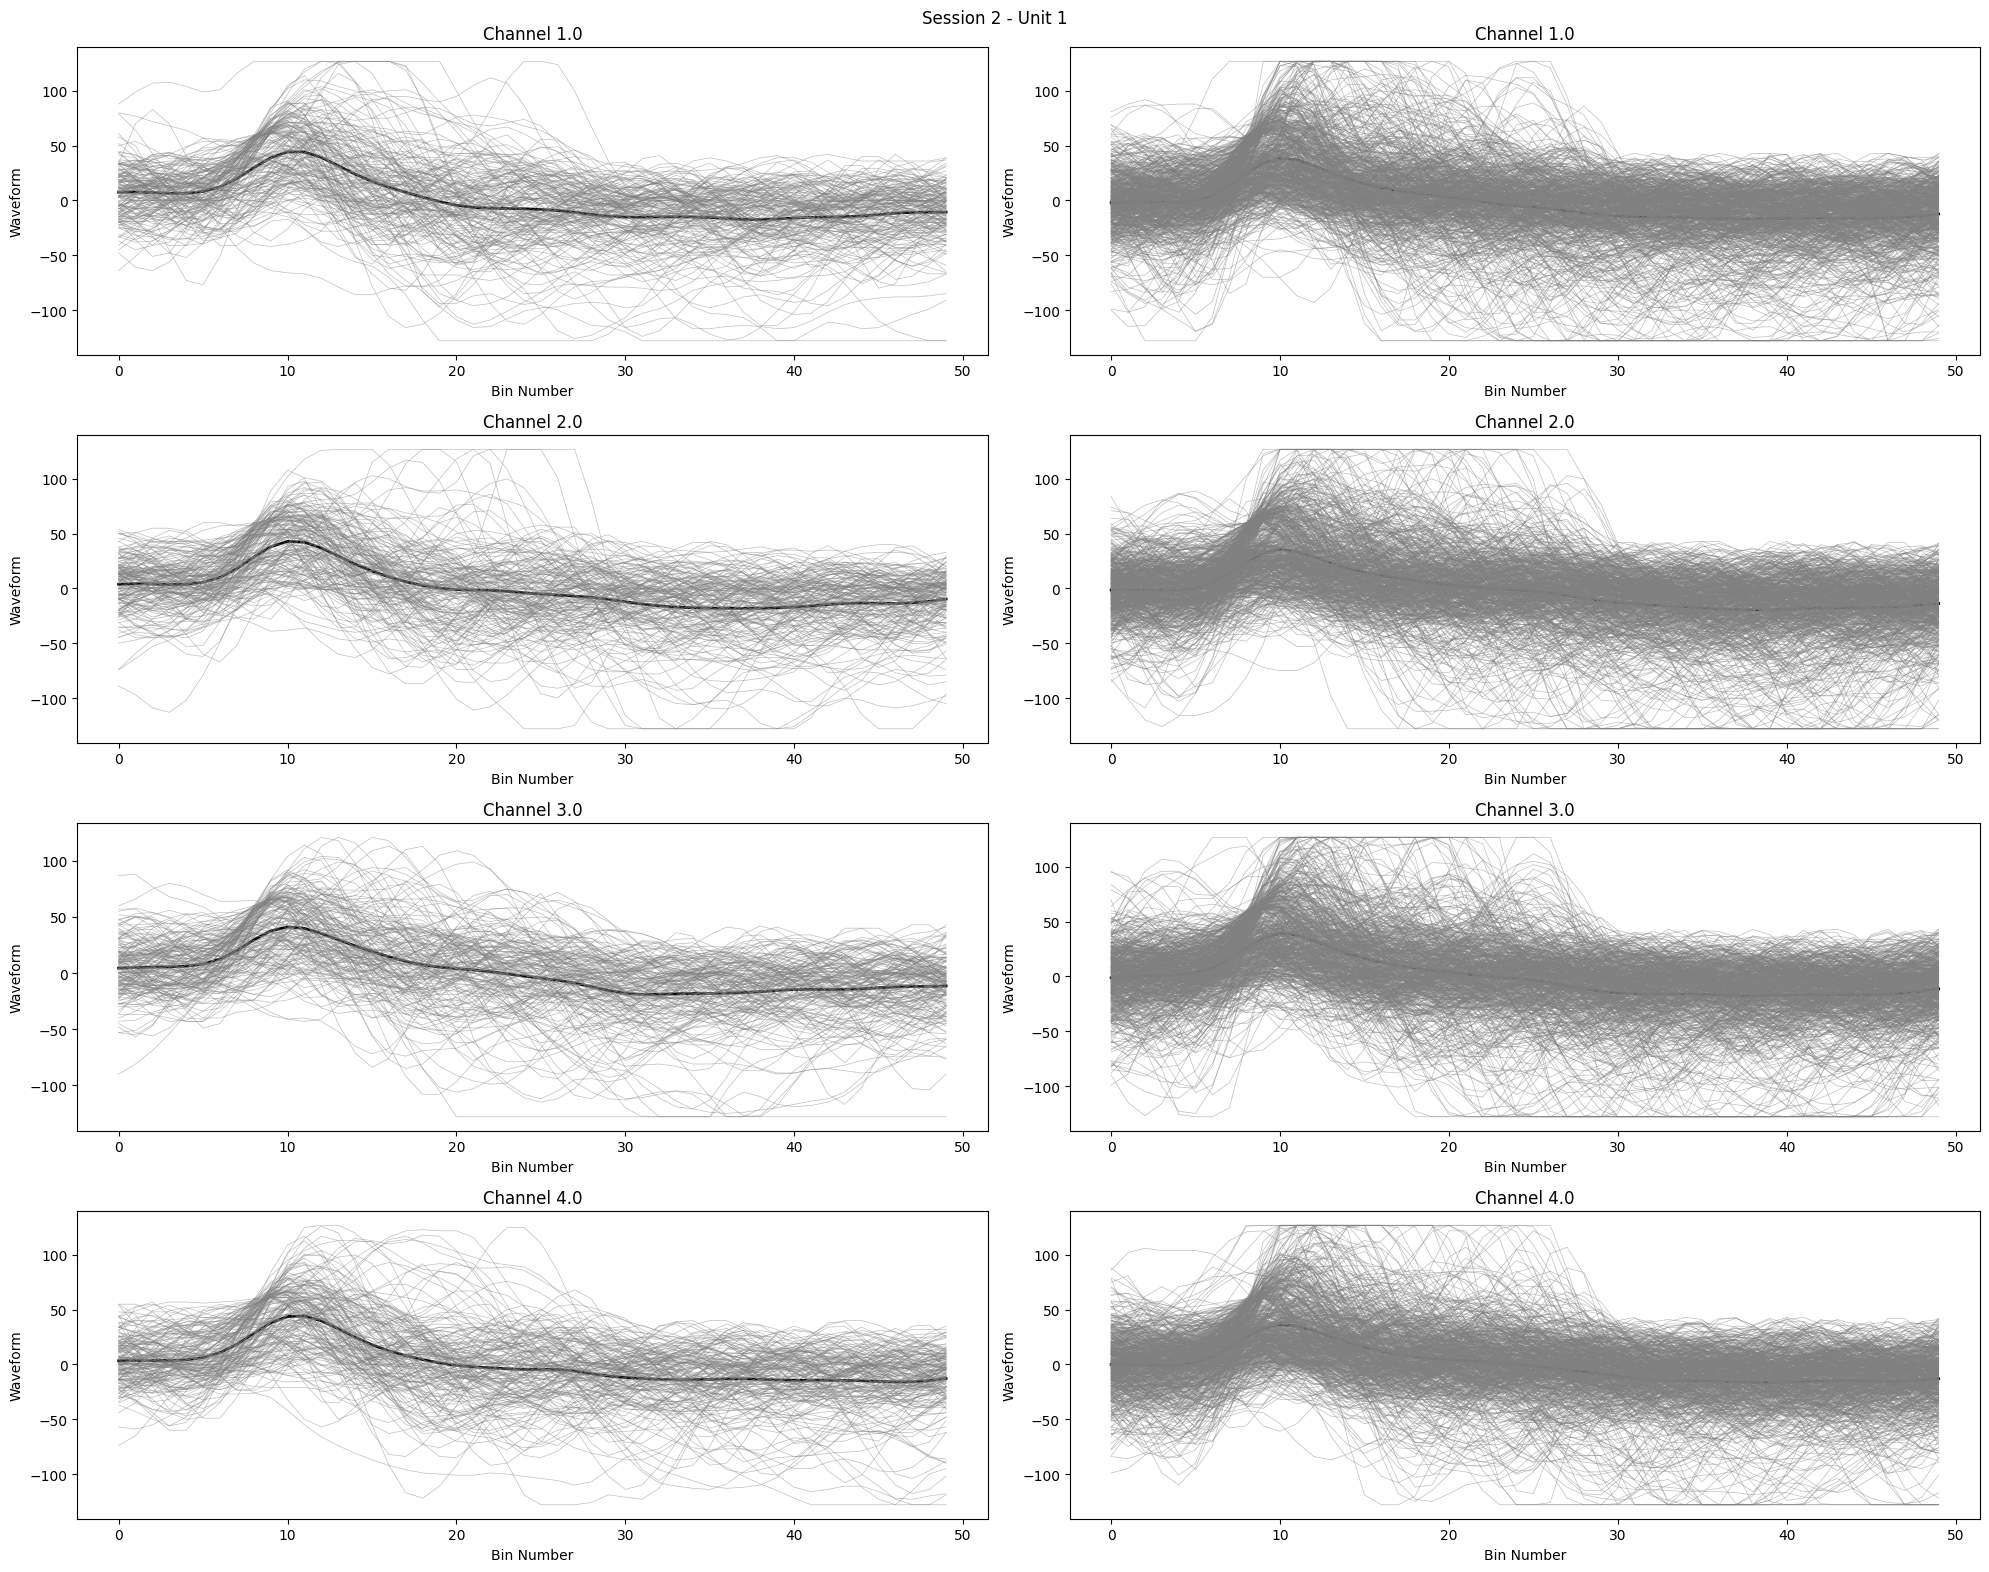

In [50]:
pair_count = len(ensemble1.get_label_ids())

# for i in range(pair_count):
for i in range(3):

    fig = plt.figure(figsize=(20,16))

    axes = []

    waveforms1 = ensemble1.cells[i].signal
    waveforms2 = ensemble2.cells[i].signal

    avg_waveforms1 = np.mean(waveforms1, axis=0)
    avg_waveforms2 = np.mean(waveforms2, axis=0)

    assert waveforms1.shape[1] == avg_waveforms1.shape[0]

    for j in range(0,avg_waveforms1.shape[0]*2,2):
        ax1 = plt.subplot(avg_waveforms1.shape[0],2,j+1)
        ax2 = plt.subplot(avg_waveforms1.shape[0],2,j+2)

        ax1.plot(waveforms1[:,int(j/2)].T, color='gray', lw=0.5, alpha=0.5)
        ax2.plot(waveforms2[:,int(j/2)].T, color='gray', lw=0.5, alpha=0.5)

        ax1.plot(avg_waveforms1[int(j/2)], color='k', lw=2)
        ax2.plot(avg_waveforms2[int(j/2)], color='k', lw=2)

        ax1.set_title('Channel ' + str(j/2+1))
        ax2.set_title('Channel ' + str(j/2+1))

        axes.append(ax1)
        axes.append(ax2)

    for ax in axes:
        ax.set_xlabel('Bin Number')
        ax.set_ylabel('Waveform')

    fig.suptitle('Session 1 - Unit ' + str(i+1))
    fig.suptitle('Session 2 - Unit ' + str(i+1))

    fig.tight_layout()
    plt.show()


In [35]:
for i in range(0,9*2,2):
    print(i)

0
2
4
6
8
10
12
14
16
